In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Law of Large Numbers

As the number of experiment repetitions increases, the average of the sample means better approximate the population mean.

$$lim_{x \to \infty} P(|\bar{x}_n - u| > \epsilon) = 0$$

### Generating Random Population numbers.

In [25]:
# simulation parameters go here
population_size = 2.3e5
sample_size = 50
number_of_samples = 500

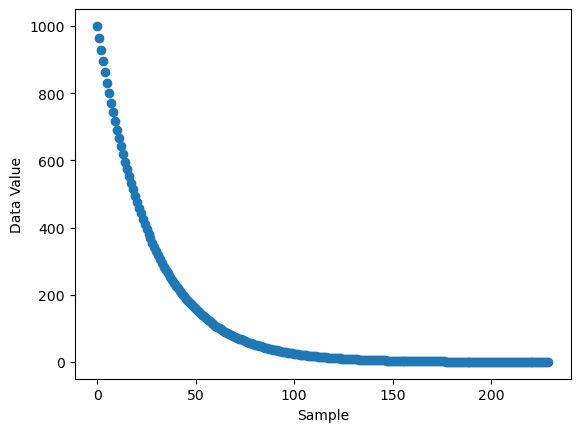

In [26]:
population = 1 / np.logspace(np.log10(0.001), np.log10(5), int(population_size))

skip = 1000

plt.plot(population[::skip], 'o')
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

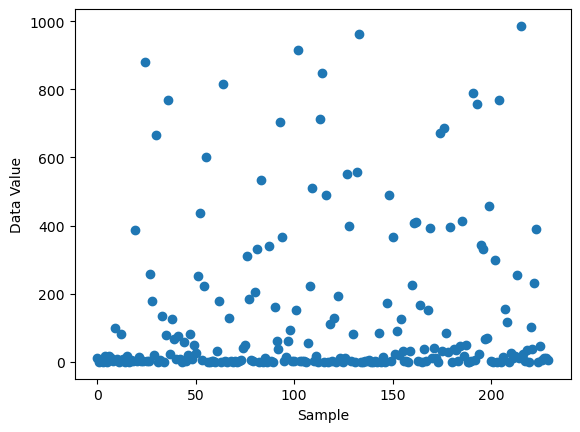

In [31]:
# shuffle data
np.random.shuffle(population)

true_mean = np.mean(population)

plt.plot(population[::skip], 'o')
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

### Monte-Carlo Sampling

Get the 50 random points, and compute their average.

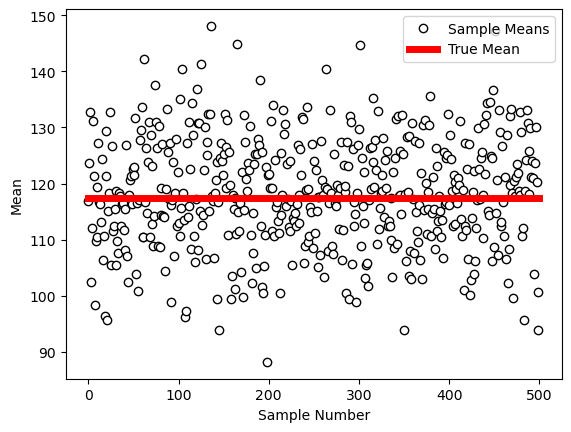

In [46]:
sample_means = np.zeros(number_of_samples)

for i in range(number_of_samples):
  # Randomly select 50 elements from the population
  selected_elements = np.random.choice(population, size=sample_size, replace=False)
  sample_means[i] = np.mean(selected_elements)

plt.plot(sample_means, 'ko', markerfacecolor='w', label="Sample Means")
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r', label='True Mean', linewidth=5)

plt.xlabel('Sample Number')
plt.ylabel('Mean')
plt.legend()
plt.show()

Sample means vary too much compare to the actual Mean. What if we increase the sample_size. Lets see

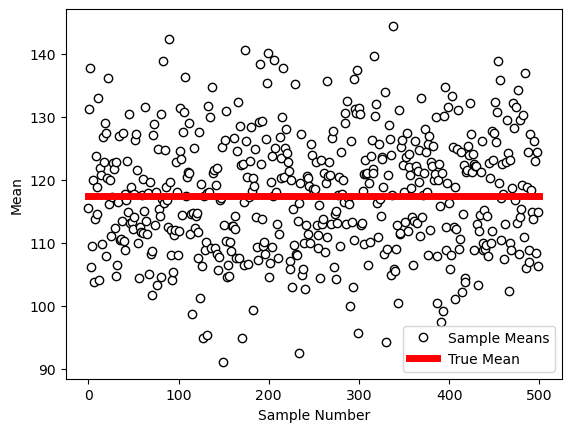

In [47]:
sample_size = 500

sample_means = np.zeros(number_of_samples)

for i in range(number_of_samples):
  # Randomly select 50 elements from the population
  selected_elements = np.random.choice(population, size=sample_size, replace=False)
  sample_means[i] = np.mean(selected_elements)

plt.plot(sample_means, 'ko', markerfacecolor='w', label="Sample Means")
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r', label='True Mean', linewidth=5)

plt.xlabel('Sample Number')
plt.ylabel('Mean')
plt.legend()
plt.show()

Variability decreases a little bit. But it still vary with respect to the Actual Mean. 

That's where law of large number comes in. If we take the average of all the samples, It will be close to the Actual Mean. Lets do it.

In [54]:
# cumulative average
cumavg = np.zeros(number_of_samples)

for i in range(number_of_samples):
  cumavg[i] = np.mean(sample_means[:i+1])

# second method
cumavg = np.cumsum(sample_means) / np.arange(1, number_of_samples+1)

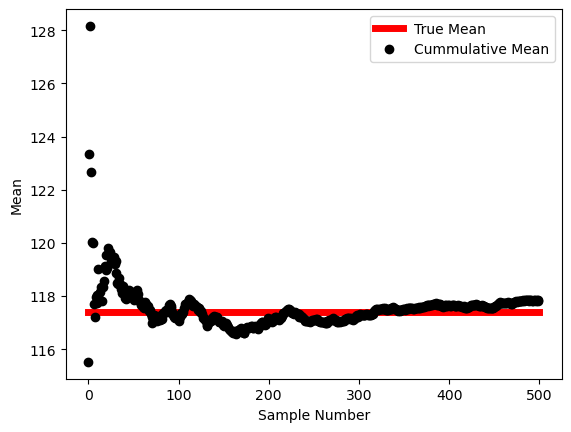

In [64]:
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r', label='True Mean', linewidth=5)
plt.plot(cumavg, 'ko', label="Cummulative Mean")

plt.xlabel('Sample Number')
plt.ylabel('Mean')
plt.legend()
plt.show()

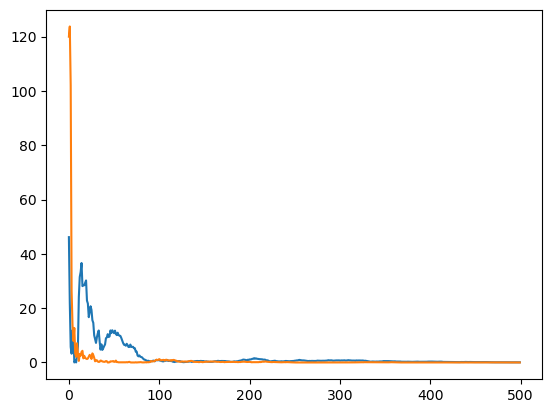

In [73]:
# more than 2 takes a lot of time, if you are in google colab, change this to 100
number_of_meta_samples = 2
cum_divergences = np.zeros((number_of_meta_samples, number_of_samples))

for metai in range(number_of_meta_samples):
  sample_means = np.zeros(number_of_samples)

  for i in range(number_of_samples):
    # Randomly select 50 elements from the population
    selected_elements = np.random.choice(population, size=sample_size, replace=False)
    sample_means[i] = np.mean(selected_elements)

  # add the new cumulative averages as a complete row
  temp_cum_avg = np.cumsum(sample_means) / np.arange(1, number_of_samples + 1)
  # calculate the divergence
  divergence = (temp_cum_avg - true_mean) ** 2
  # add the new divergences as a complete row
  cum_divergences[metai,:] = divergence

# divergences are added in the rows, means they will be on the x-axis, but we need them on the y-axis, either add divergences on the columns, or transpose the matrix
plt.plot(cum_divergences.T)
plt.show()

The Divergence Decreases, as we average more and more data toward the end.

## Central Limit Theorem

The distribution of Sample Means is going to be roughly Gaussian (Normal) Distribution. Like Bell Curve.

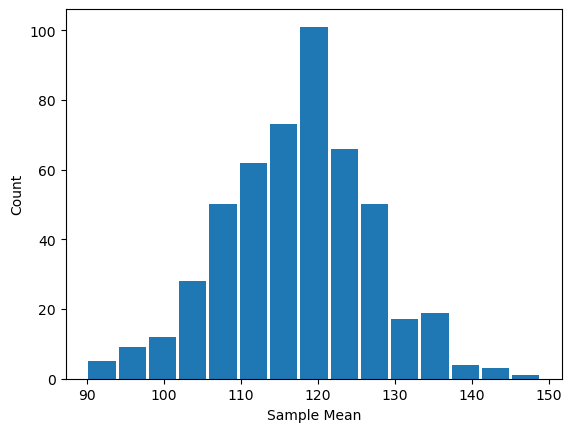

In [88]:
# sample means are already populated with sample means of 1 dataset

plt.hist(sample_means, bins=15, rwidth=.9)
plt.xlabel("Sample Mean")
plt.ylabel("Count")
plt.show()